<a href="https://colab.research.google.com/github/shady2223/UmojaHack-AFRICA-2022-PRACTICE-Beginner-Challenge/blob/main/My_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing important modules

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.random.seed(42)

from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold,StratifiedKFold ,GroupKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# VARIABLE DIFINITION
* ghsl_water_surface' - the fraction of land within 5km of the cluster that is classified as water surface
* 'ghsl_built_pre_1975' - the fraction of land within 5km of the cluster that is classified as built-up before 1975
* 'ghsl_built_1975_to_1990'
* 'ghsl_built_1990_to_2000',
* 'ghsl_built_2000_to_2014',
* 'ghsl_not_built_up' - land that was never built up
* 'ghsl_pop_density' - population density for the surrounding area (5km radius)
* Landcover: based on the Copernicus Global Land Cover Layers (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_Landcover_100m_Proba-V-C3_Global)

* 'Landcover_crops_fraction' - the fraction of land within 5km of the cluster that is classified as cropland
* 'landcover_urban_fraction' - the fraction of land within 5km of the cluster that is classified as urban
* 'Landcover_water_permanent_10km_fraction' - the fraction of land within 10km of the cluster that is classified as permanent water
* 'Landcover_water_seasonal_10km_fraction' - the fraction of land within 10km of the cluster that is classified as seasonal water
* 'Nighttime_lights' - a classic indicator of economic activity
* 'Dist_to_capital' - distance to the countries capital
* 'Dist_to_shoreline - distance to the nearest ocean shoreline
* ‘urban_or_rural’: Is the cluster in an urban (‘U’) or rural (‘R’) setting

loading th data

In [3]:
train=pd.read_csv('drive/MyDrive/MACHINE LEARNING PROJECTS/economic-well-being-prediction-competition/Train.csv')
test=pd.read_csv('drive/MyDrive/MACHINE LEARNING PROJECTS/economic-well-being-prediction-competition/Test.csv')

In [4]:
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [5]:
print(train.shape)
print(test.shape)

(21454, 19)
(7194, 18)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       21454 non-null  object 
 1   country                                  21454 non-null  object 
 2   year                                     21454 non-null  int64  
 3   urban_or_rural                           21454 non-null  object 
 4   ghsl_water_surface                       21454 non-null  float64
 5   ghsl_built_pre_1975                      21454 non-null  float64
 6   ghsl_built_1975_to_1990                  21454 non-null  float64
 7   ghsl_built_1990_to_2000                  21454 non-null  float64
 8   ghsl_built_2000_to_2014                  21454 non-null  float64
 9   ghsl_not_built_up                        21454 non-null  float64
 10  ghsl_pop_density                         21454

From above you can see that the following columns where not a numerical columns 'ID, country,urban_or_rurla ' and the remaining columns where numeric

In [7]:
#checking for null values in the datasets
train.isnull().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

In [8]:
#checking for null values in the training sets
test.isnull().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
dtype: int64

SO THERE ARE NO ANY MISSING VALUES FROM OUR DATASETS, Almost our data sets looks some how very clear

# EDA

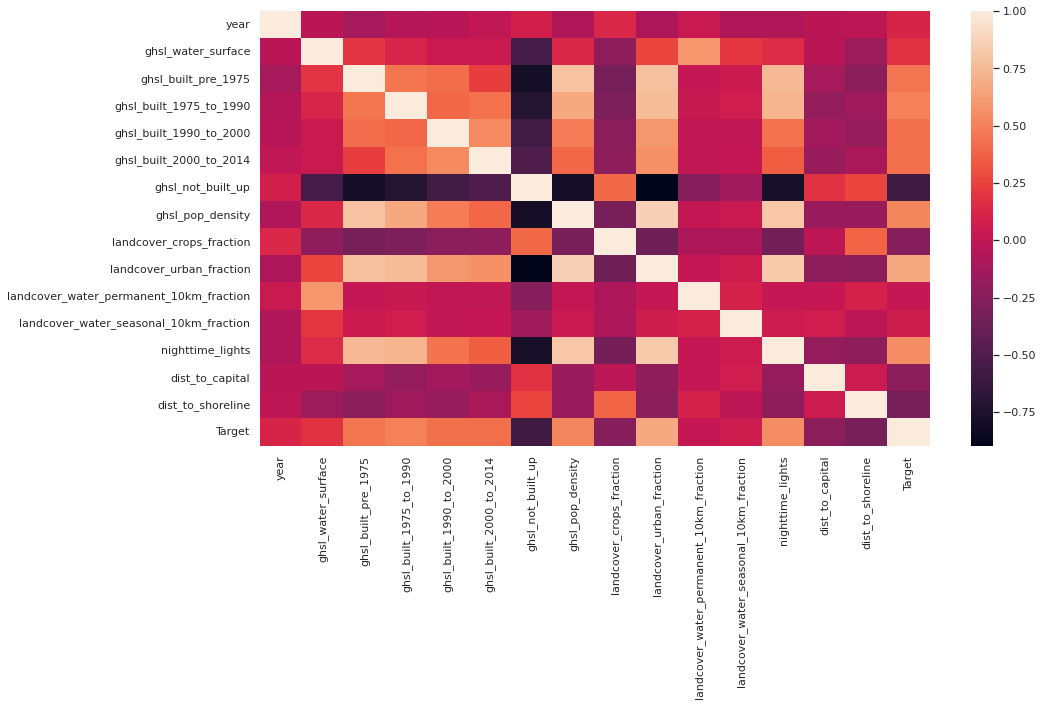

In [9]:
#Checking the correlation between dependent and independent features
sns.set(rc = {'figure.figsize':(15,8)})
ax=sns.heatmap(train.corr())

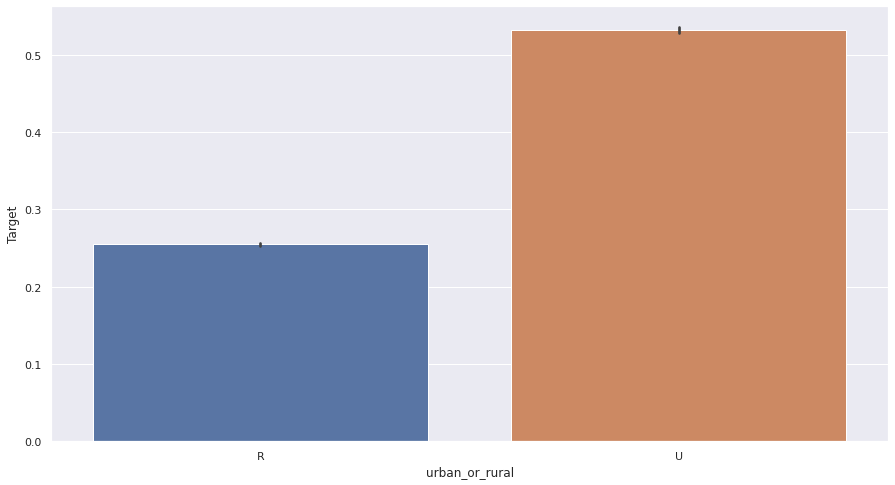

In [14]:
#checking the distribution of the categorical feature
sns.barplot(x='urban_or_rural',y='Target',data=train)

From above we can interplet that most of peoples where leaving in urban area than rural areas

# Preparing the datasets
 From above analysis now we are going to prepare the datasets so as so fit into our model

In [ ]:
def get_processed_data() :

    #LOADING THE DATA SETS
    train = pd.read_csv('drive/MyDrive/MACHINE LEARNING PROJECTS/economic-well-being-prediction-competition/Train.csv')
    test  = pd.read_csv('drive/MyDrive/MACHINE LEARNING PROJECTS/economic-well-being-prediction-competition/Test.csv')

    #COMBINE THE TO DATASETS

    data = pd.concat([train, test]).reset_index(drop=True)

    #definign categorical features
    col = ['country', 'year', 'urban_or_rural']
    
    ## Count of unique features
    for i in col:
        data['count_'+i] = data[i].map(data[i].value_counts())
        
    ## FEATURE ENGINEERING
    data['all_ghsl'] = data['ghsl_built_1975_to_1990']+data['ghsl_built_pre_1975']+data['ghsl_built_1990_to_2000']+data['ghsl_built_2000_to_2014']
    data['all_landcover_fraction'] = data['landcover_crops_fraction']+data['landcover_urban_fraction']
    data['all_waters'] = data['landcover_water_permanent_10km_fraction'] + data['landcover_water_seasonal_10km_fraction']
    
    # GET train , test
    train = data[data['ID'].isin(train['ID'].values)]
    test = data[~data['ID'].isin(train['ID'].values)]
    features = [x for x in train.columns if x not in 
                ['ID','country','urban_or_rural','Target','year']]
    return train , test , features

In [ ]:
train , test , features = get_processed_data()

# Definig the model
 So we will use a RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def get_model(Name='lgbm') :
    if Name=='lgbm' :
      return RandomForestRegressor(random_state=42)

# Fitting and generating predictions

In [ ]:
from sklearn.preprocessing import RobustScaler

#rf=RandomForestRegressor(random_state=42)
#Rb=RobustScaler()
Model_Name = "lgbm"

X = train[features]
y = train['Target']
test_ = test[features]
#X_scaled=Rb.fit_transform(X)
#test_scaled=Rb.fit_transform(test_)


folds = KFold(n_splits=10, shuffle=True, random_state=2021)
oofs  = np.zeros((len(X)))
test_predictions = np.zeros((len(test)))


for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    
    X_trn, y_trn = X.iloc[trn_idx], y.iloc[trn_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    

    clf = get_model(Name=Model_Name)
    clf.fit(X_trn, y_trn
             )
    
    vp = clf.predict(X_val)
    oofs[val_idx] = vp
    val_score = mean_squared_error((vp), (y_val),squared=False)
    print(4*'-- -- -- --')
    print(f'Fold {fold_+1} Val score: {val_score}')
    print(4*'-- -- -- --')
    
    tp = clf.predict(test_)
    test_predictions += tp / folds.n_splits
    print()
print(3*'###',10*"^",3*'###')
print(mean_squared_error(y, oofs,squared=False))

-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 1 Val score: 0.08964584115076062
-- -- -- ---- -- -- ---- -- -- ---- -- -- --

-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 2 Val score: 0.0933429549869158
-- -- -- ---- -- -- ---- -- -- ---- -- -- --

-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 3 Val score: 0.08531459750598601
-- -- -- ---- -- -- ---- -- -- ---- -- -- --

-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 4 Val score: 0.08837868521185407
-- -- -- ---- -- -- ---- -- -- ---- -- -- --

-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 5 Val score: 0.08770568062285788
-- -- -- ---- -- -- ---- -- -- ---- -- -- --

-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 6 Val score: 0.08870946715268349
-- -- -- ---- -- -- ---- -- -- ---- -- -- --

-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 7 Val score: 0.09110344019158777
-- -- -- ---- -- -- ---- -- -- ---- -- -- --

-- -- -- ---- -- -- ---- -- -- ---- -- -- --
Fold 8 Val score: 0.0888888180447021
-- -- -- ---- --

In [ ]:
submission.to_csv('drive/MyDrive/MACHINE LEARNING PROJECTS/economic-well-being-prediction-competition/7th_submission.csv', index=False)

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test['ID']
submission['Target'] = np.clip(test_predictions, 0.141000, 0.808657)